<a href="https://colab.research.google.com/github/hafsaaah/Diamond-Price-predcition/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np # linear algebra
import pandas as pd #

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
df=pd.read_csv('/content/drive/MyDrive/gemstone.csv')

In [102]:
dfdup=df.copy()

In [103]:
dfdup.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [104]:
dfdup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [105]:
dfdup.isnull().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


In [106]:
## Lets drop the id column
df1=dfdup.drop(labels=['id'],axis=1)
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [107]:
## check for duplicated records
dfdup.duplicated().sum()

0

In [108]:
## segregate numerical and categorical columns

numerical_columns=dfdup.columns[dfdup.dtypes!='object']
categorical_columns=dfdup.columns[dfdup.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [109]:
dfdup[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [110]:

dfdup[numerical_columns].describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [111]:
dfdup['cut'].value_counts()

,count
cut,
Ideal,92454
Premium,49910
Very Good,37566
Good,11622
Fair,2021


In [112]:
dfdup['color'].value_counts()

,count
color,
G,44391
E,35869
F,34258
H,30799
D,24286
I,17514
J,6456


In [113]:
dfdup['clarity'].value_counts()

,count
clarity,
SI1,53272
VS2,48027
VS1,30669
SI2,30484
VVS2,15762
VVS1,10628
IF,4219
I1,512


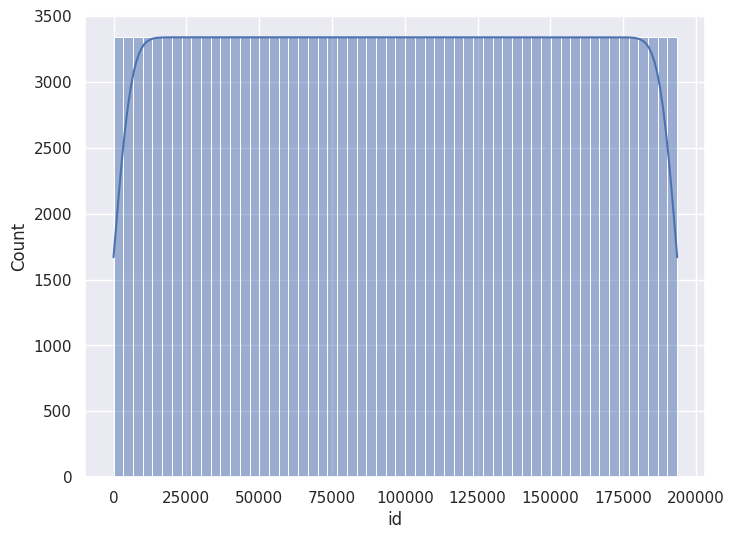

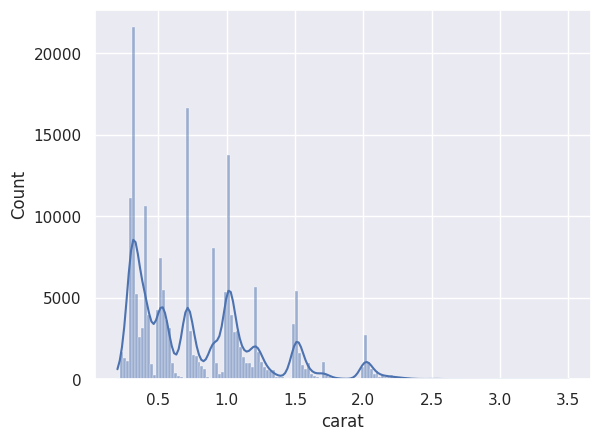

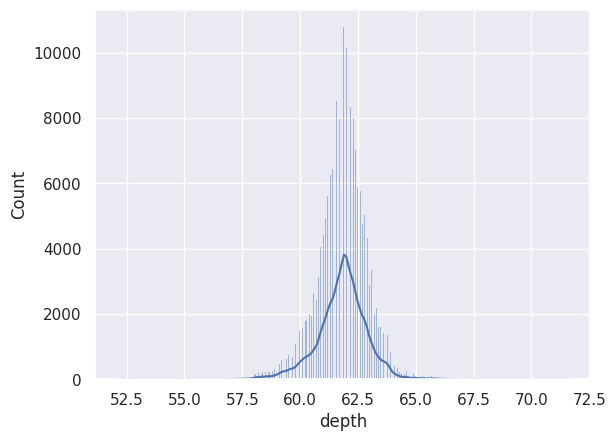

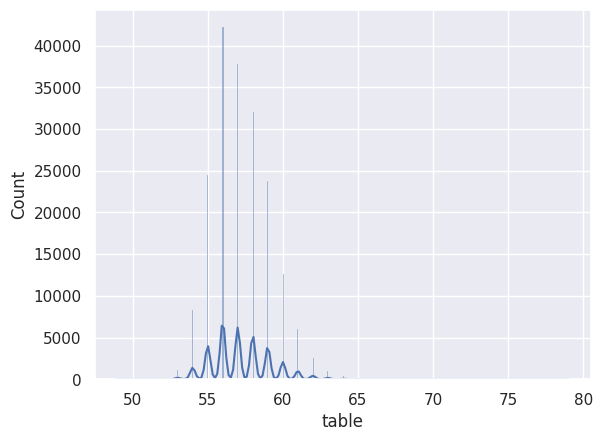

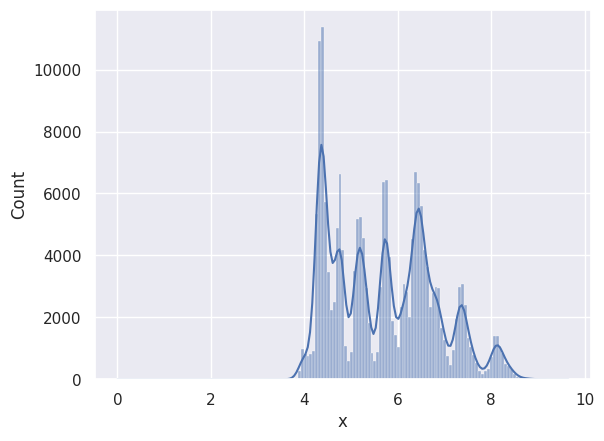

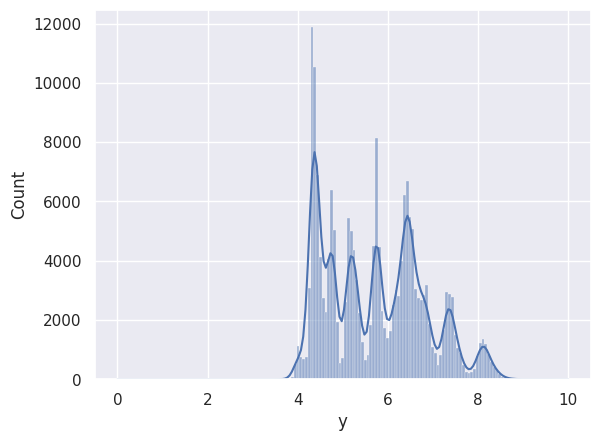

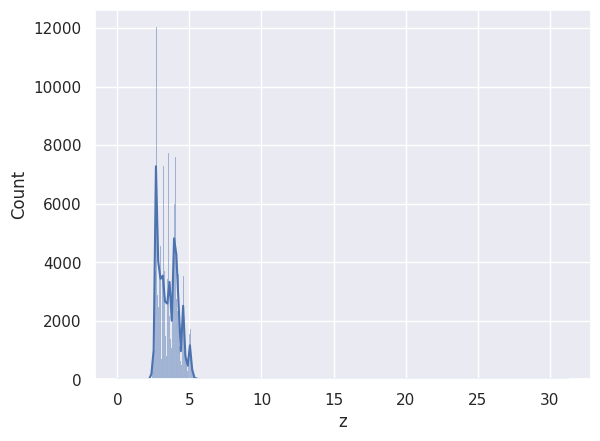

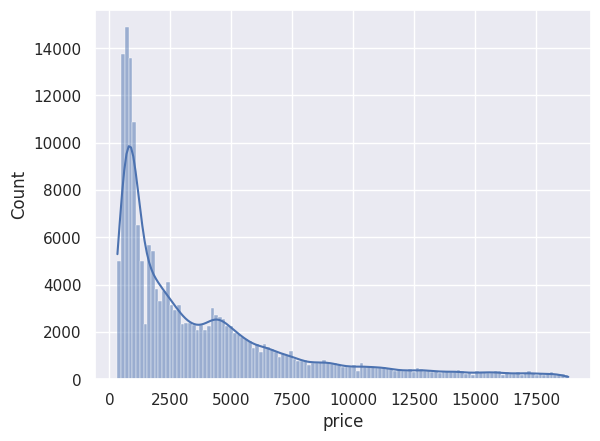

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=dfdup,x=i,kde=True)
    print('\n')
    plt.show()



<Figure size 800x600 with 0 Axes>

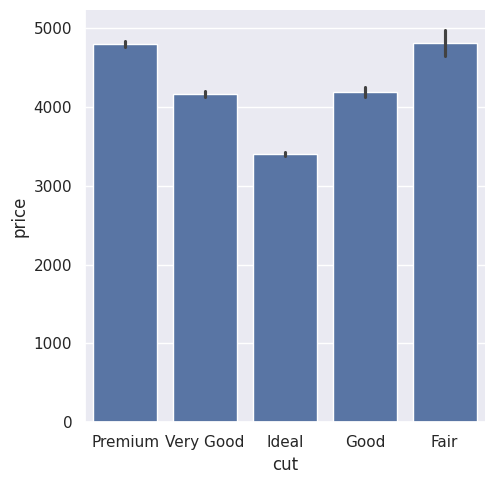

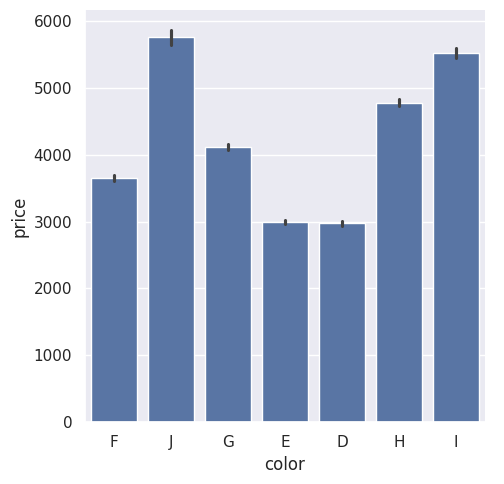

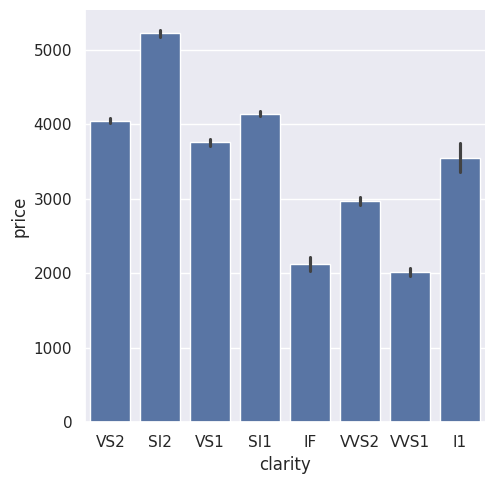

In [115]:
## For categorical data
plt.figure(figsize=(8,6))

for i in categorical_columns:
    sns.catplot(data=dfdup,x=i,y="price",kind="bar")
    print('\n')
    plt.show()

In [116]:
corr1 = dfdup[numerical_columns].corr()
corr1

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.000771,0.002647,0.002448,-0.000476,-0.000448,0.000037,-0.001392
carat,-0.000771,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.002647,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.002448,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,-0.000476,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,-0.000448,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.000037,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,-0.001392,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

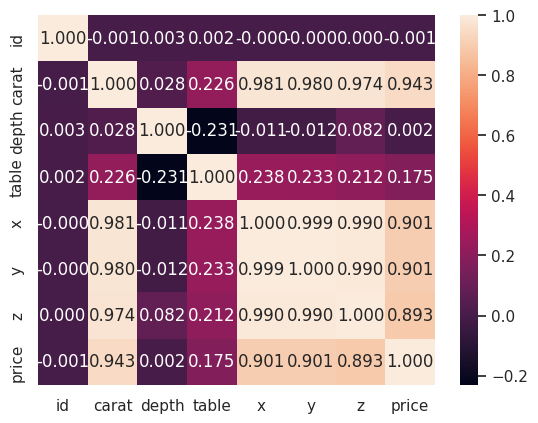

In [117]:
## correlation
sns.heatmap(corr1, annot=True,fmt=".3f")

In [118]:
dfdup['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [119]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [120]:
dfdup['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [121]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [122]:
dfdup['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [123]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [124]:
dfdup['cut']=dfdup['cut'].map(cut_map)
dfdup['clarity'] = dfdup['clarity'].map(clarity_map)
dfdup['color'] = dfdup['color'].map(color_map)

In [132]:
dfdup.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [126]:
import warnings
warnings.filterwarnings("ignore")

In [131]:

dfdup.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,4.132152,3.516157,3.975084,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,0.994157,1.623091,1.501776,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,1.000000,1.000000,1.000000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,3.000000,2.000000,3.000000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,4.000000,4.000000,4.000000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,5.000000,5.000000,5.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,5.000000,7.000000,8.000000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [130]:
# Drop the 'id' column
dfdup = dfdup.drop('id', axis=1)


<Axes: >

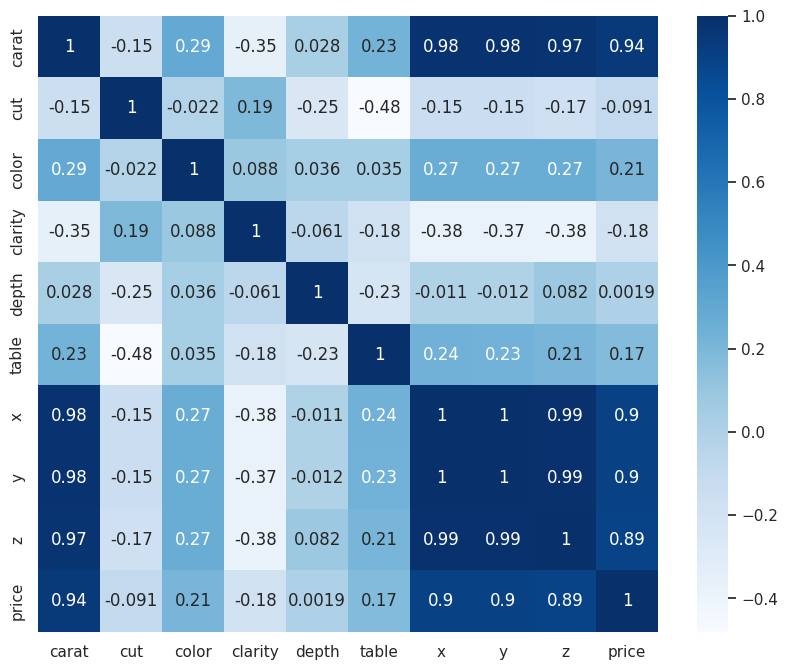

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(dfdup.corr(), annot=True, cmap='Blues')

In [134]:
def get_high_correlation_features(data, threshold):
    # Compute the correlation matrix
    correlation_matrix = dfdup.corr()

    # Find features with correlation greater than the threshold
    high_corr_features = set()
    for row in correlation_matrix.columns:
        for col in correlation_matrix.columns:
            if(correlation_matrix[row][col] > threshold and row != col):
                high_corr_features.add(row)

    return high_corr_features

In [135]:
high_correlated_features = get_high_correlation_features(df1.drop(['price'], axis = 1),0.85)
high_correlated_features

{'carat', 'price', 'x', 'y', 'z'}

In [140]:
dfdup.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,4,3,4,62.2,58.0,13619
1,2.03,3,7,2,62.0,58.0,13387
2,0.70,5,4,5,61.2,57.0,2772
3,0.32,5,4,5,61.6,56.0,666
4,1.70,4,4,4,62.6,59.0,14453


In [137]:
# Unique value for these three features
print('Unique values for diamond cut :', dfdup['cut'].unique())
print('Unique values for diamond color :', dfdup['color'].unique())
print('Unique values for diamond clarity :', dfdup['clarity'].unique())

Unique values for diamond cut : [4 3 5 2 1]
Unique values for diamond color : [3 7 4 2 1 5 6]
Unique values for diamond clarity : [4 2 5 3 8 6 7 1]


In [141]:
dfdup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   price    193573 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 10.3 MB


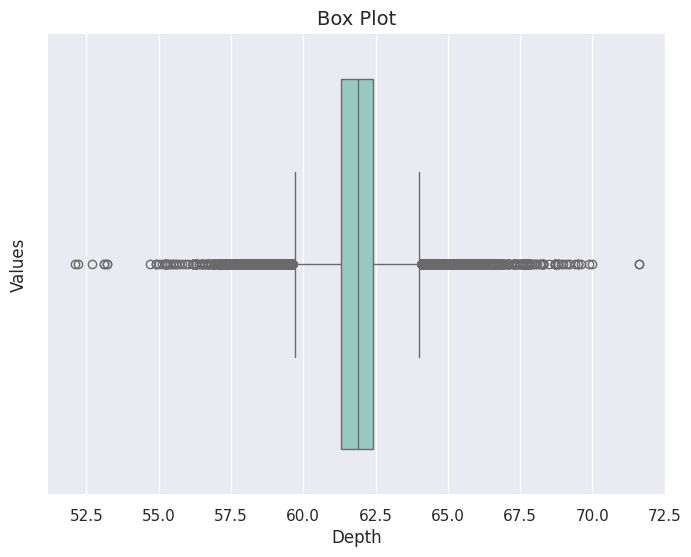

In [142]:
## Seeing outlier in depth

import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn theme
sns.set_theme()

# Adjust the color palette
custom_palette = sns.color_palette("Set3")
# Set figure size
plt.figure(figsize=(8, 6))
# Set labels and title
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Box Plot', fontsize=14)


sns.boxplot(x=dfdup['depth'], palette=custom_palette)

# Display the plot
plt.show()


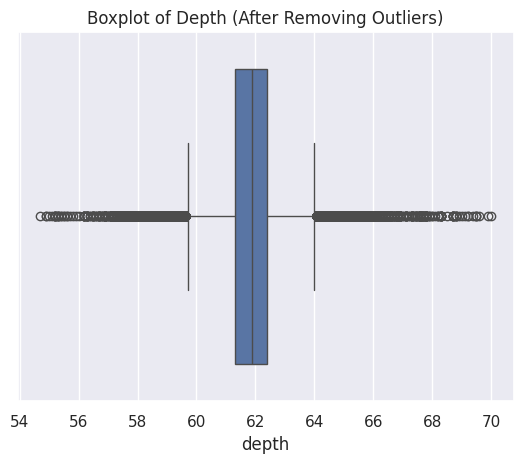

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Drop rows where depth is greater than 70 or less than 20 (considered outliers)
dfdup = dfdup.drop(dfdup[(dfdup['depth'] > 71.5) | (dfdup['depth'] < 54)].index)

# Plot boxplot for the 'depth' column
sns.boxplot(x=dfdup['depth'])

# Show the plot
plt.title('Boxplot of Depth (After Removing Outliers)')
plt.show()


<Axes: xlabel='depth', ylabel='price'>

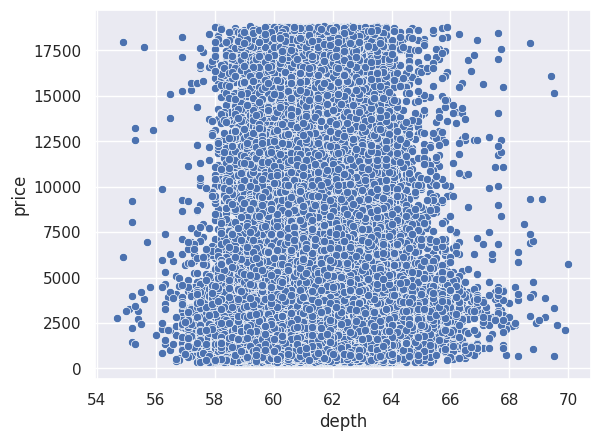

In [148]:
sns.scatterplot(x=dfdup['depth'], y=dfdup['price'])

## **visualisation**


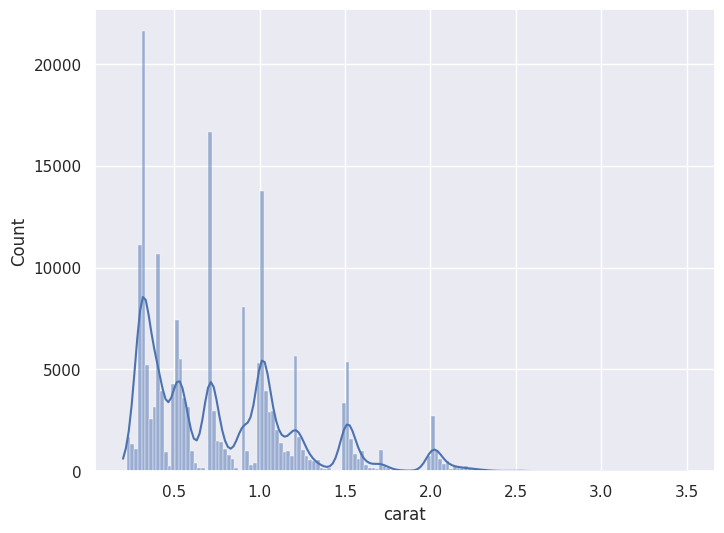

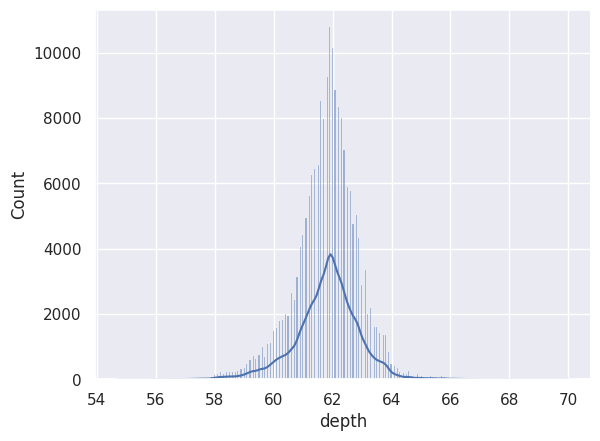

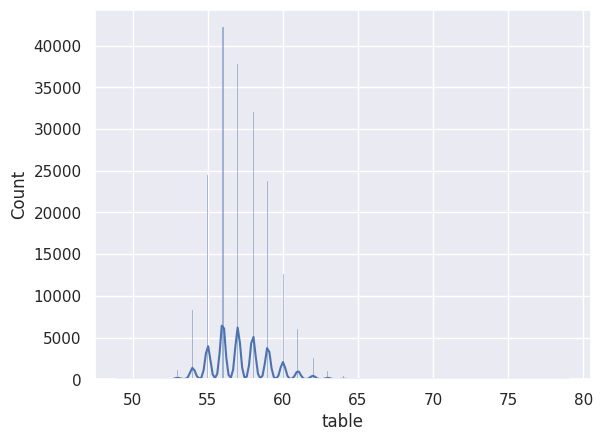

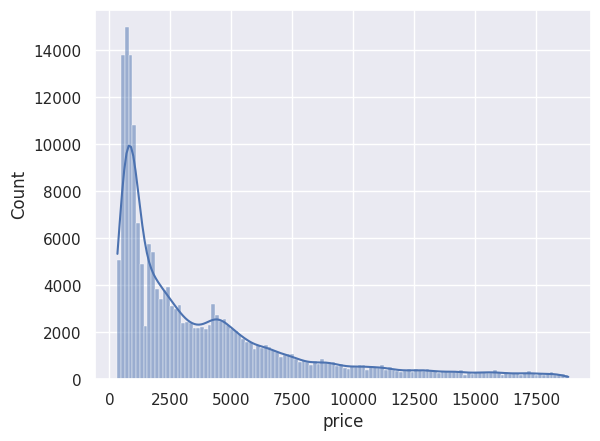

In [150]:
feature = ['carat', 'depth', 'table', 'price']
plt.figure(figsize=(8,6))
x=0
for i in feature:
    sns.histplot(data=dfdup,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

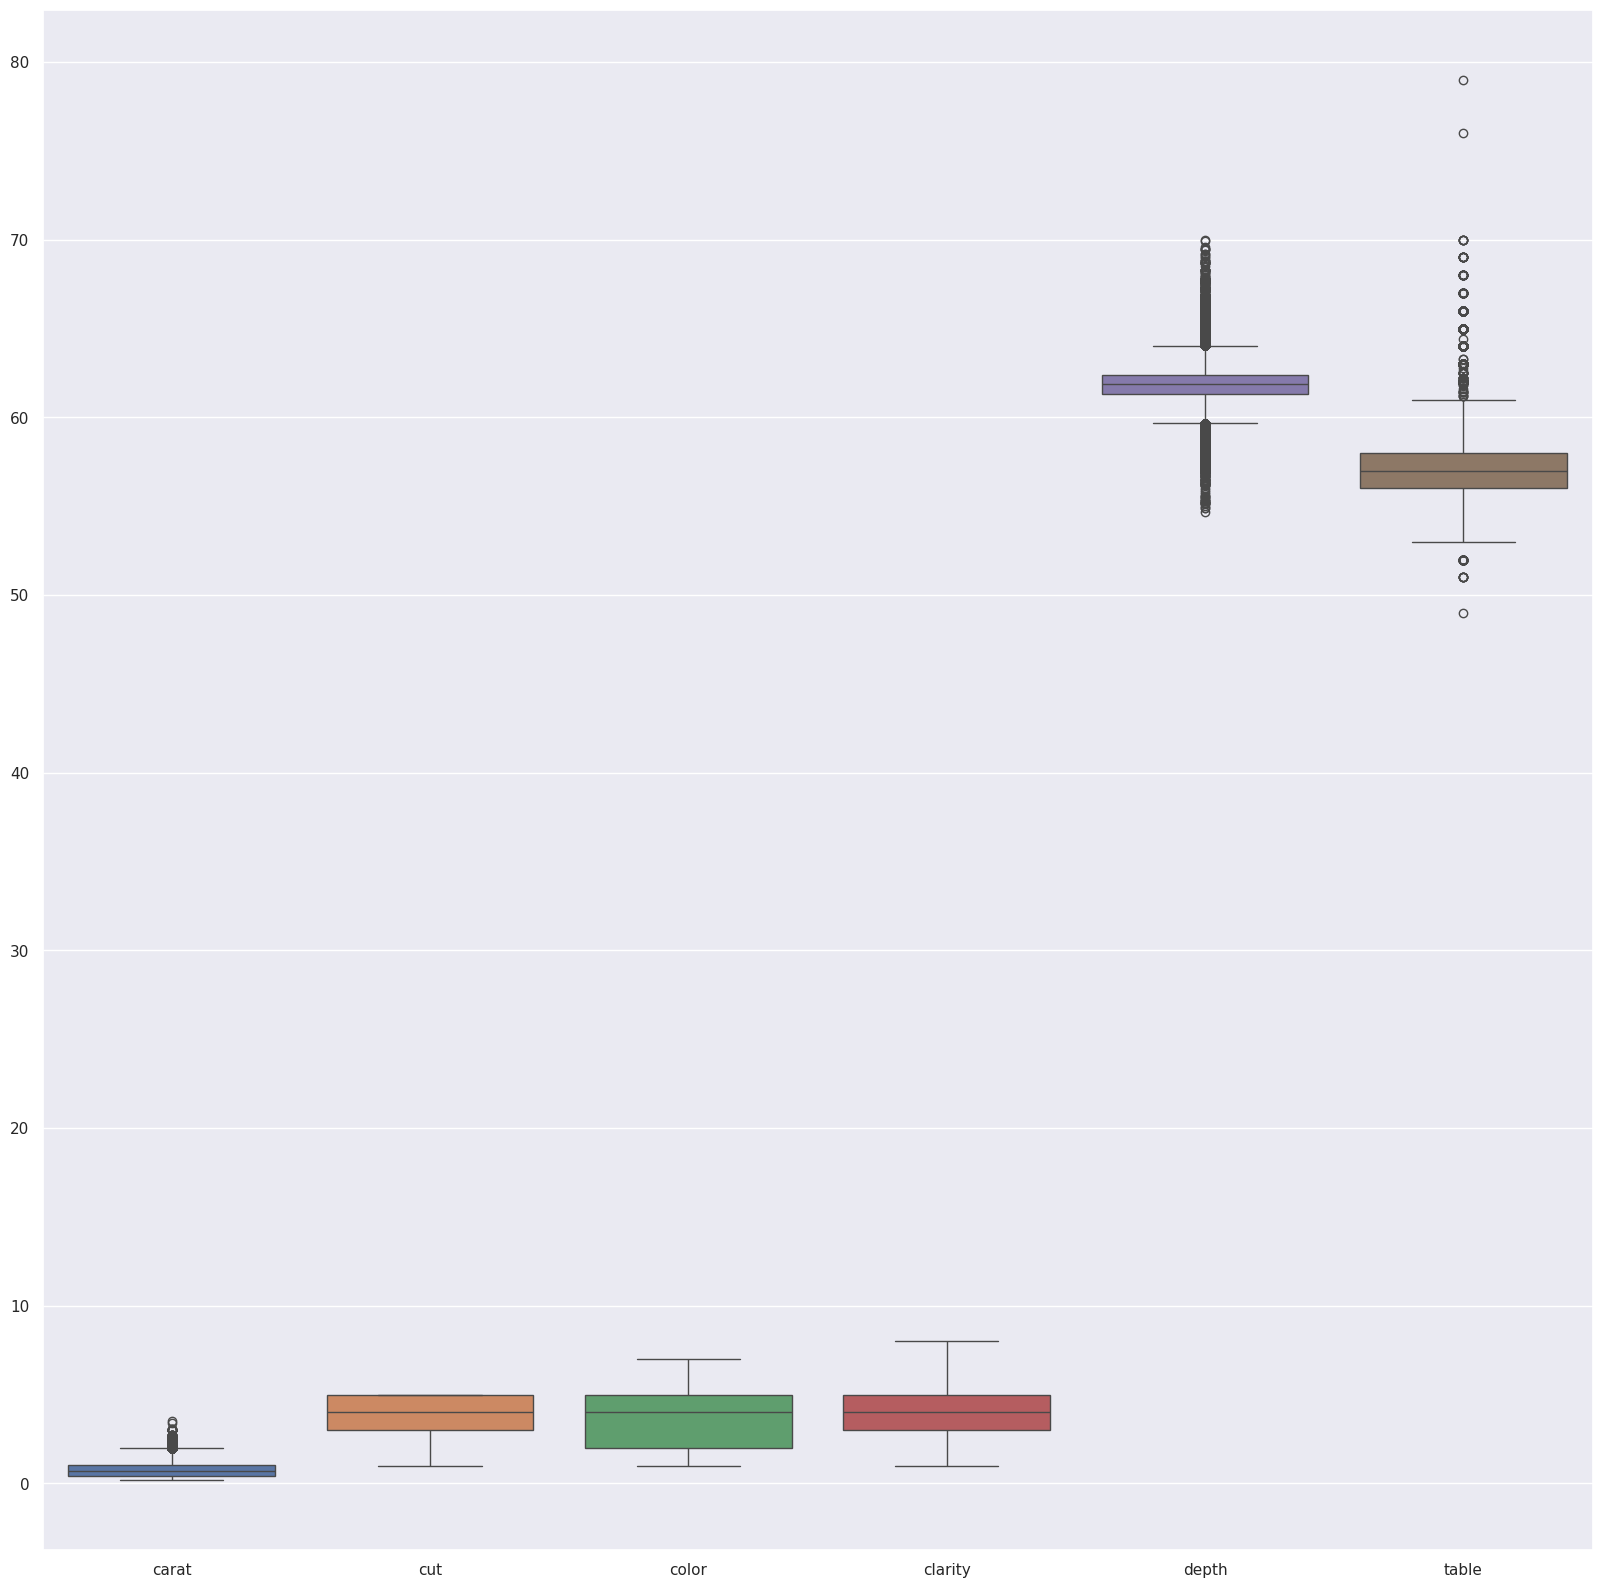

In [151]:
plt.figure(figsize=(20,20))
sns.boxplot(dfdup.drop(['price'], axis=1))

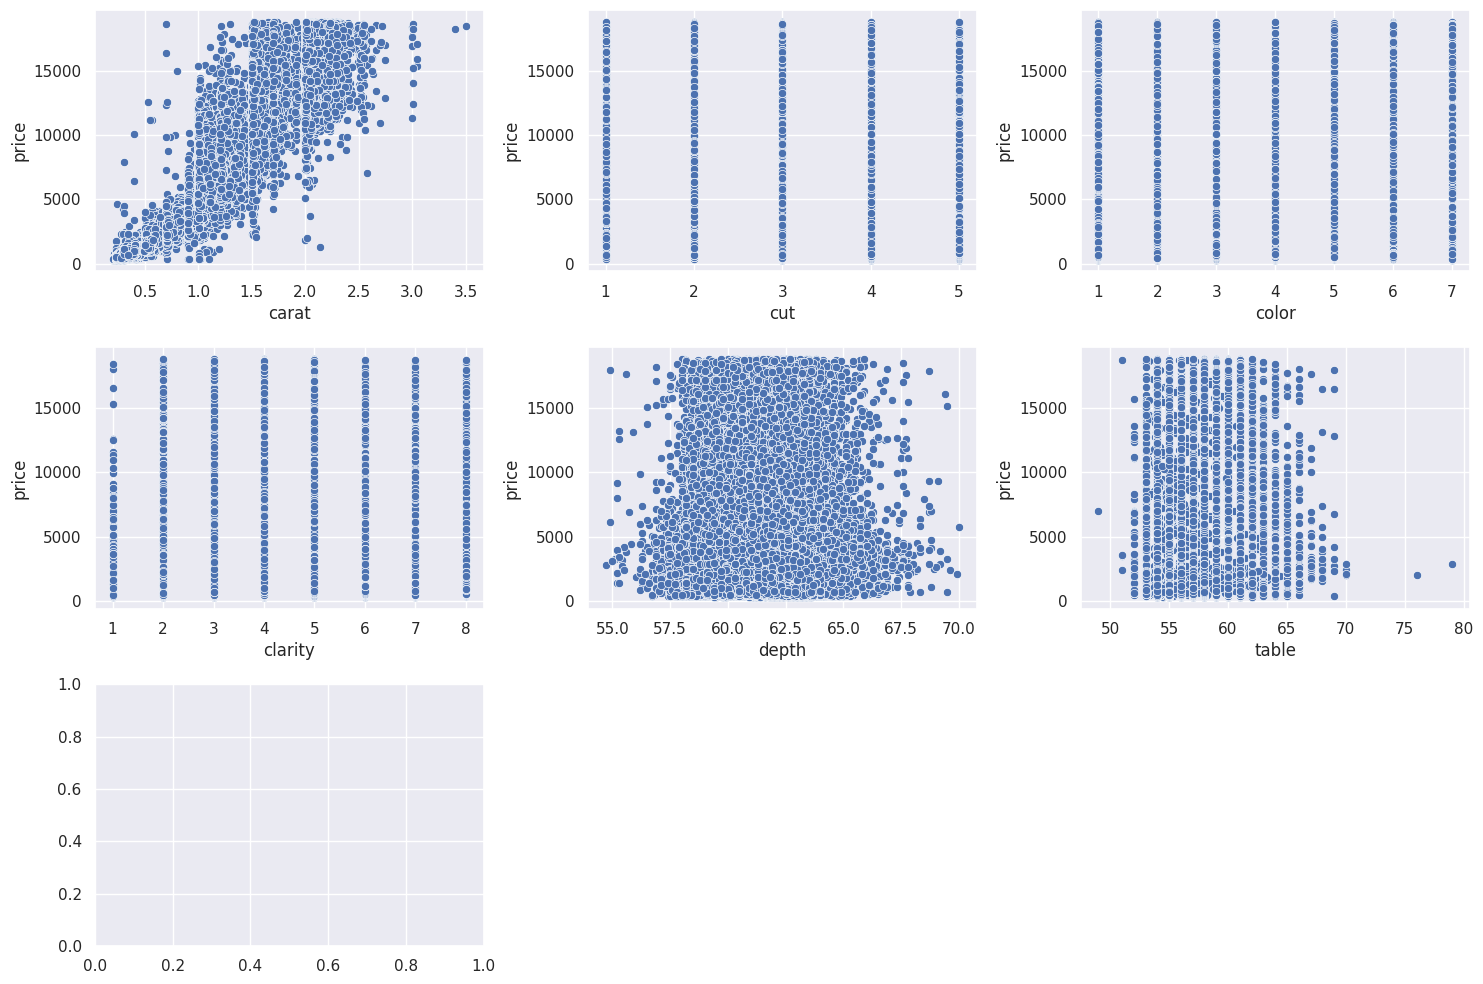

In [153]:
# Set the number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(dfdup.columns) - 1) // n_cols + 1

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop through each feature (excluding 'price') and create scatter plots
for i, feature in enumerate(dfdup.columns):
    if feature != 'price':
        if feature != 'price':
            sns.scatterplot(x=dfdup[feature], y=dfdup['price'], ax=axes[i])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('price')

# Remove any empty subplots if the number of features is not divisible by n_cols
if len(dfdup.columns) % n_cols != 0:
    for j in range(len(dfdup.columns) % n_cols, n_cols):
        fig.delaxes(axes[-j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

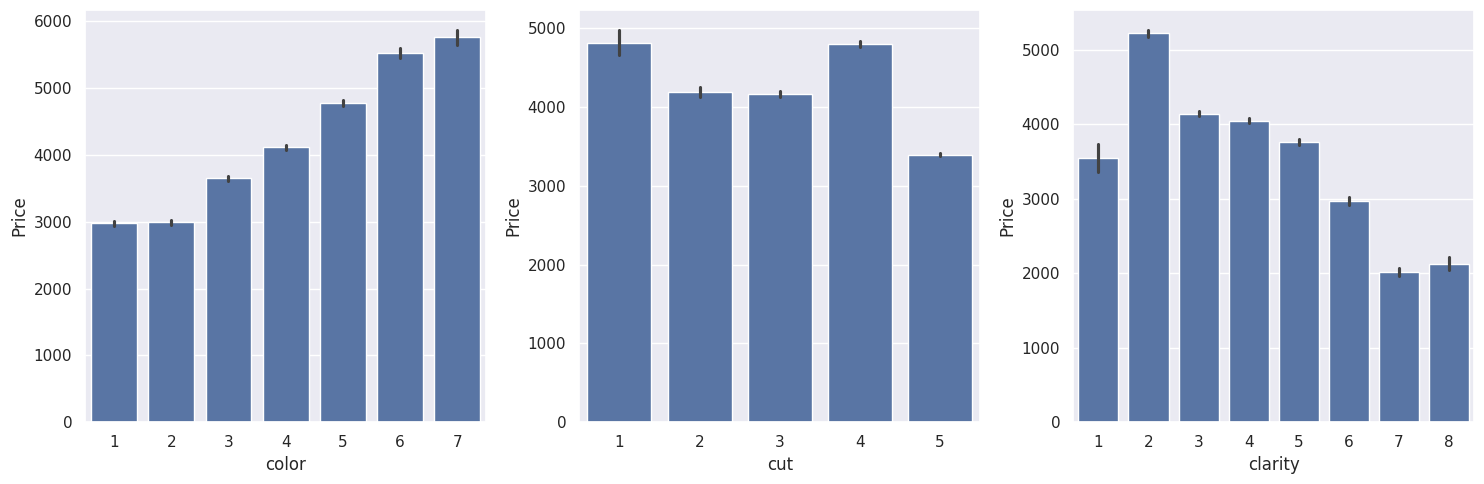

In [155]:
n_cols = 3
n_rows = 1

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
axes = axes.flatten()

# create bar plots
for i, feature in enumerate(['color', 'cut', 'clarity']):
    sns.barplot(x=feature, y='price', data=dfdup, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

if len(['color', 'cut', 'clarity']) % n_cols != 0:
    for j in range(len(['color', 'cut', 'clarity']) % n_cols, n_cols):
        fig.delaxes(axes[-j])

# Adjust subplots
fig.tight_layout()
plt.show()

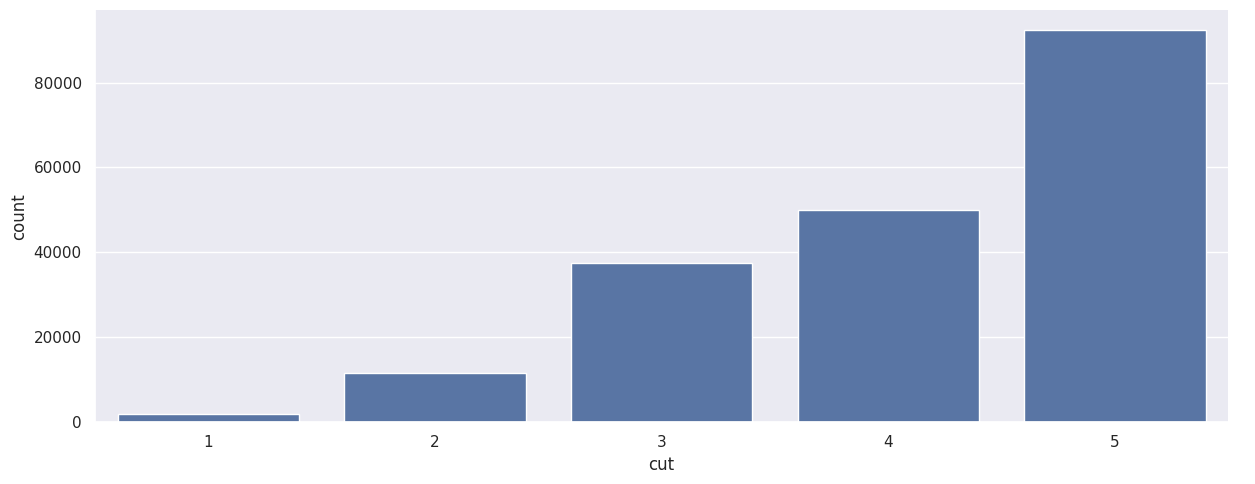

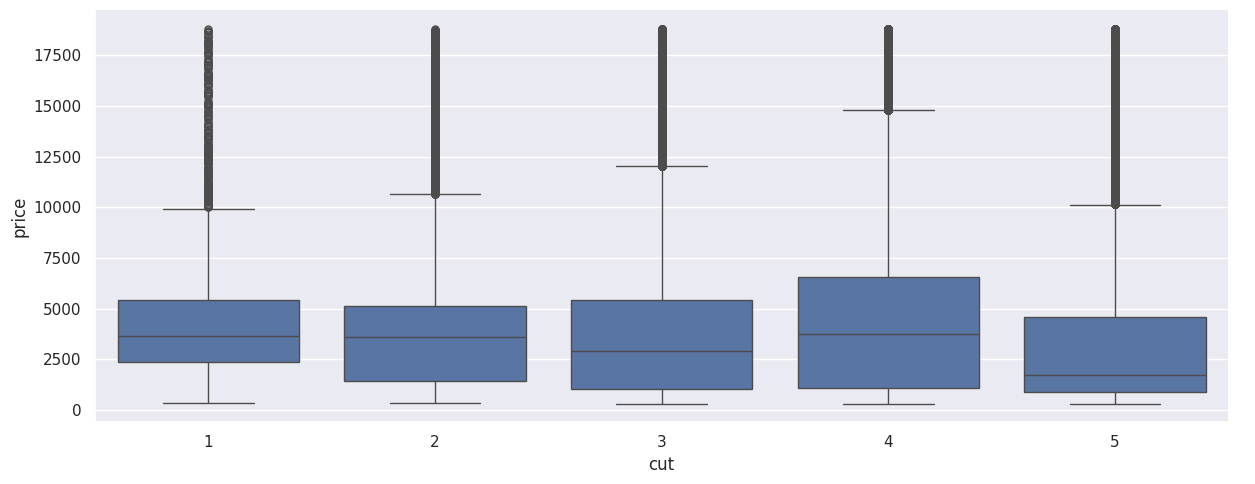

In [156]:
# plot for "cut"
sns.catplot(x= "cut", data = dfdup, kind = "count", aspect = 2.5)
sns.catplot(x = "cut", y = "price", kind = "box", data = dfdup, aspect = 2.5)

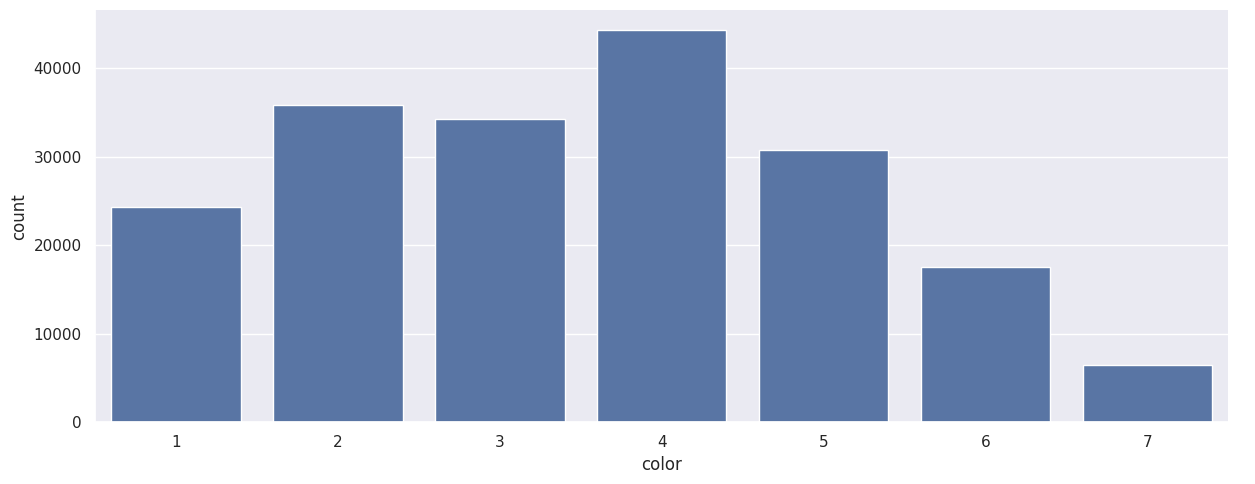

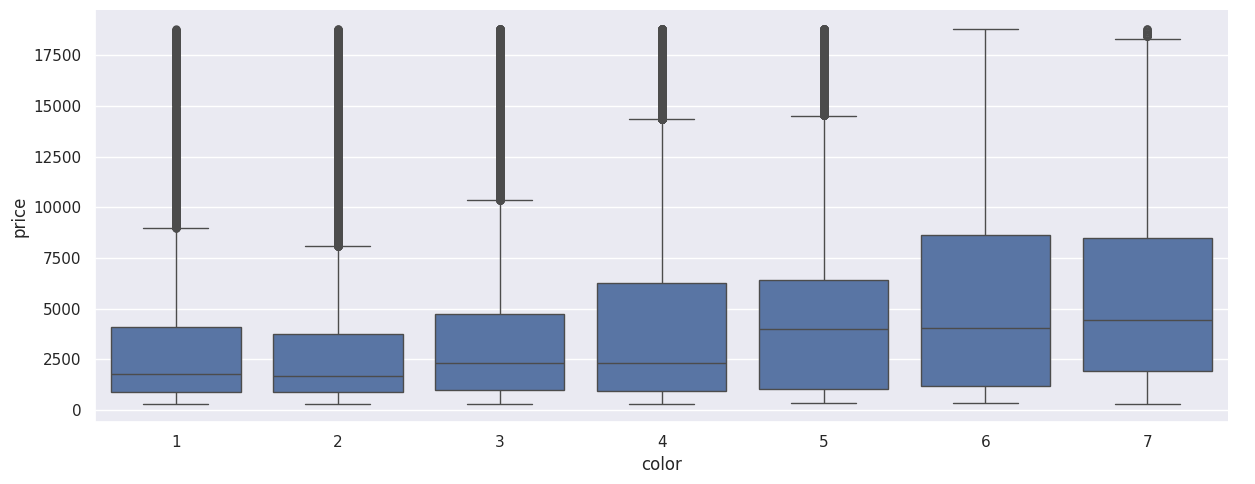

In [157]:
# plot for "color"
sns.catplot(x = "color", data = dfdup, kind = "count", aspect = 2.5)
sns.catplot(x = "color", y = "price", kind = "box", data = dfdup, aspect = 2.5)

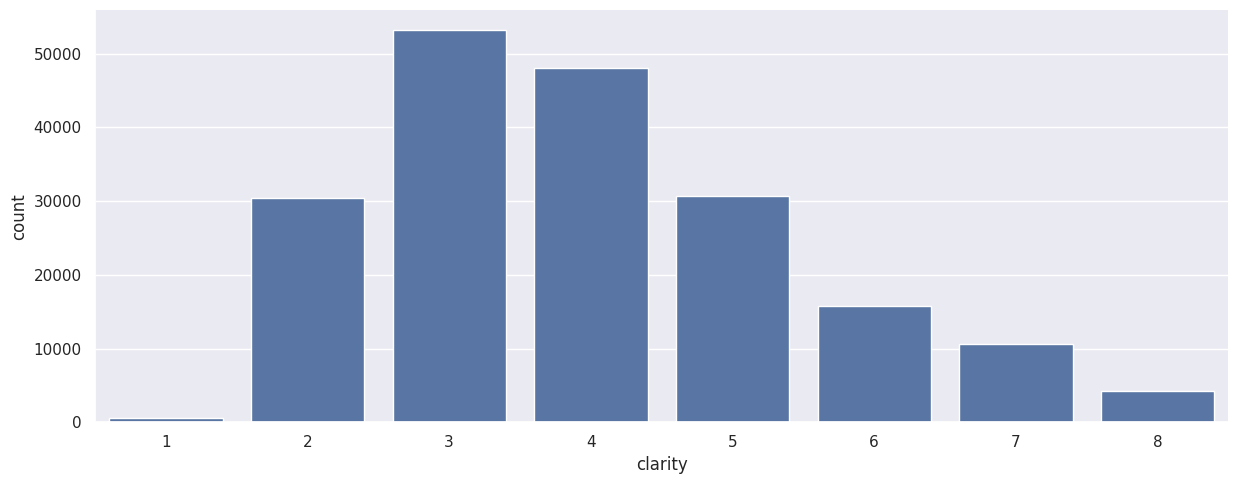

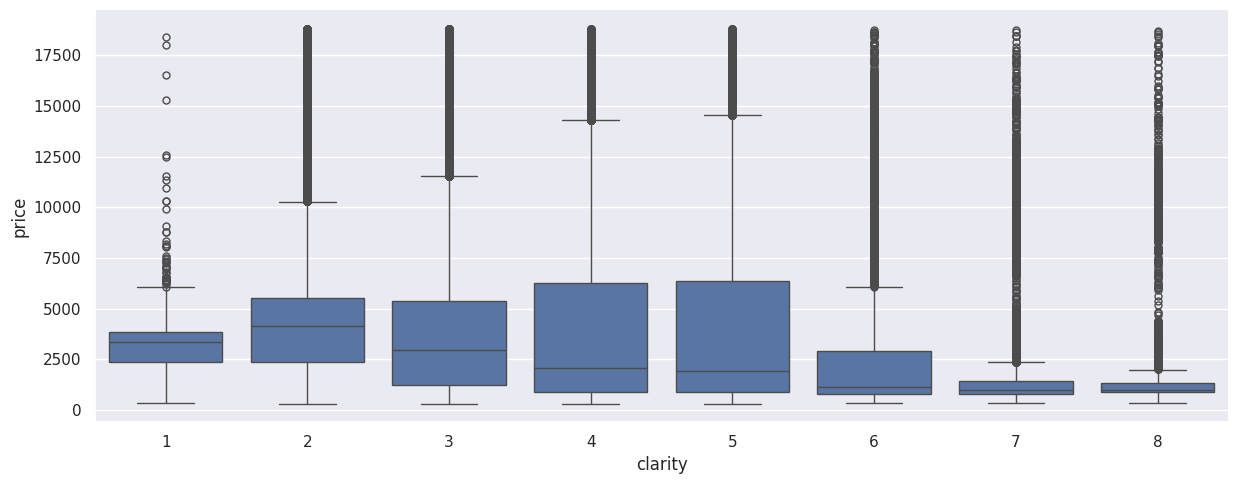

In [158]:
# plot for "clarity"
sns.catplot(x ="clarity", data = dfdup, kind = "count", aspect = 2.5)
sns.catplot(x = "clarity", y = "price", kind = "box", data = dfdup, aspect = 2.5)

In [164]:
# Invert the mappings to get back the original categories
reverse_cut_map = {v: k for k, v in cut_map.items()}
reverse_clarity_map = {v: k for k, v in clarity_map.items()}
reverse_color_map = {v: k for k, v in color_map.items()}


In [166]:
# Map the numerical values back to the original categories
dfdup['cut'] = dfdup['cut'].map(reverse_cut_map)
dfdup['clarity'] = dfdup['clarity'].map(reverse_clarity_map)
dfdup['color'] = dfdup['color'].map(reverse_color_map)


In [167]:
dfdup.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


In [171]:
import pandas as pd

# Assuming 'df' is your preprocessed DataFrame
# Randomly sample 10 rows for unseen data
unseen_data1 = dfdup.sample(n=10, random_state=42)

# Remove the 10 sampled rows from the original DataFrame to keep for training
training_data1 = dfdup.drop(unseen_data.index)

# Save both datasets as CSV files

# Save the unseen data as a CSV
unseen_data1.to_csv('unseen_data.csv', index=False)

# Save the remaining training data as a CSV
training_data1.to_csv('training_data.csv', index=False)


In [172]:
unseen_data1.head(10)

,carat,cut,color,clarity,depth,table,price
14868,0.50,Ideal,D,SI1,62.1,57.0,1355
165615,1.50,Premium,G,SI1,61.1,61.0,11511
186783,0.31,Premium,F,VS2,62.0,59.0,625
28407,1.51,Very Good,G,VS2,61.8,58.0,13007
118687,1.55,Ideal,G,VS1,61.5,57.0,13736
185919,0.30,Very Good,G,VVS1,62.8,55.0,789
192339,0.30,Premium,F,VVS2,60.8,60.0,640
30715,1.21,Ideal,F,VS2,62.4,56.0,8654
86424,1.03,Ideal,E,SI2,61.8,57.0,4795
9293,1.20,Very Good,I,SI1,62.3,61.0,5390


In [173]:


# Save the unseen data to Google Drive
unseen_data1.to_csv('/content/drive/My Drive/unseen_datanew.csv', index=False)

# Save the training data to Google Drive
training_data1.to_csv('/content/drive/My Drive/training_datanew.csv', index=False)